In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [121]:
df = pd.read_csv('Series/daily-total-female-births-in-cal.csv')

In [122]:
series = df['Count']

In [4]:
series_1 = np.linspace(0, 50, 100)

In [123]:
def moving_average(series, n):
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    return series.rolling(n).mean()

In [124]:
ser = moving_average(series, 7)

In [125]:
trend_ma = moving_average(series, 44)

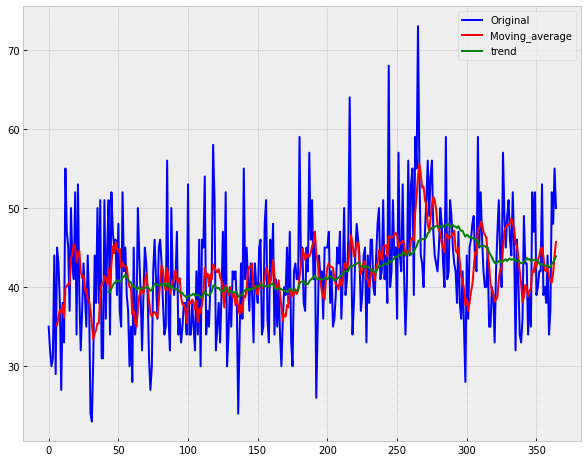

In [126]:
with plt.style.context('bmh'):
    plt.figure(figsize=(10,8))
    plt.plot(series, color='blue', label='Original')
    plt.plot(ser, color='red', label='Moving_average')
    plt.plot(trend_ma, color='green', label='trend')
    plt.legend()

#### Функция для предсказания значений с помощью MA

In [9]:
def predict_ma(series, N, n_pred):
    new_series = series.copy()
    for i in range(n_pred):
        new_series = new_series.append(pd.Series([new_series[-N:].mean()]), ignore_index=True)
    return new_series

In [10]:
predict_series = predict_ma(series, 20, 100)

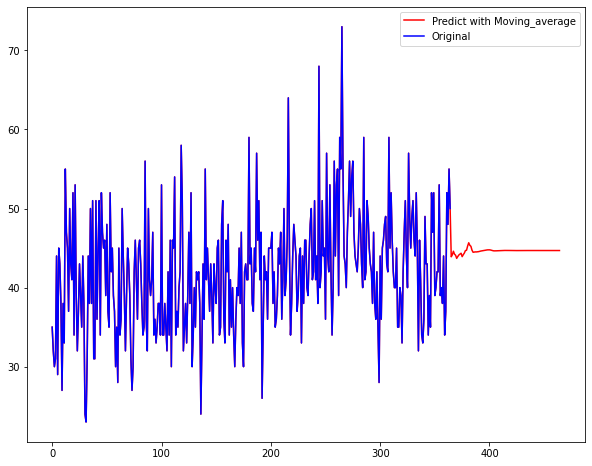

In [11]:
plt.figure(figsize=(10,8))
plt.plot(predict_series, color='red', label='Predict with Moving_average')
plt.plot(series, color='blue', label='Original')
plt.legend()

#### Взвешанная скользящая средняя WMA

In [14]:
def weighted_moving_average(series, n, weights):
    if not isinstance(weights, np.ndarray):
        weights = np.array(weights)
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    wma = series.rolling(n).apply(lambda s: (s * weights).sum() / weights.sum(), raw=True)
    return wma

In [15]:
ser_wma = weighted_moving_average(series, 7, [1,1,2,3,5,8,13])

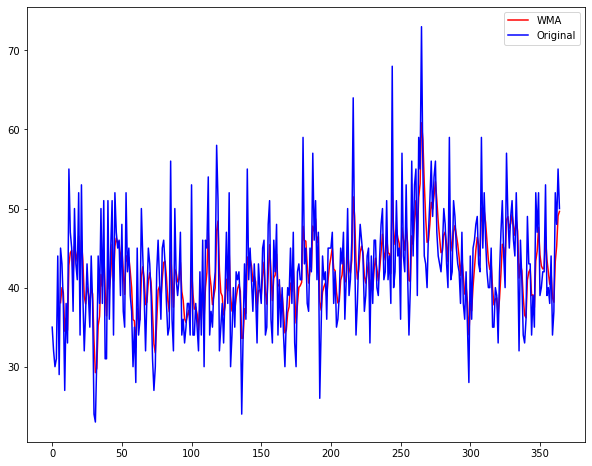

In [16]:
plt.figure(figsize=(10,8))
plt.plot(ser_wma, color='red', label='WMA')
plt.plot(series, color='blue', label='Original')
plt.legend()

In [17]:
df_1 = pd.read_csv('Series/monthly-sales-of-company-x-jan-6.csv')

#### Функция для предсказания значений по WMA

In [20]:
def predict_wma(series, N, weights, n_pred):
    
    if not isinstance(weights, np.ndarray):
        weights = np.array(weights)
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    new_series = series.copy()
    
    for i in range(n_pred):
        last_val = new_series[-N:]
        wma = (last_val * weights).sum() / weights.sum()
        new_series = new_series.append(pd.Series([wma]), ignore_index=True)
    return new_series

In [21]:
predict_series = predict_wma(df_1['Count'], 7, [1, 1, 2, 3, 5, 8, 13], 20)

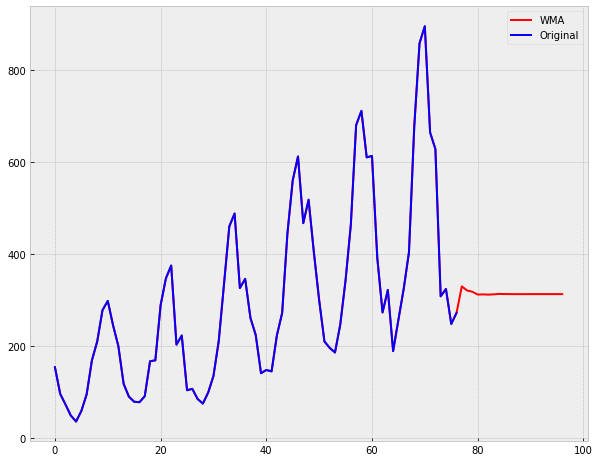

In [22]:
with plt.style.context('bmh'):
    plt.figure(figsize=(10,8))
    plt.plot(predict_series, color='red', label='WMA')
    plt.plot(df_1['Count'], color='blue', label='Original')
    plt.legend()

#### Экспоненциальное сглаживание

In [23]:
def exp_moving_average(series, alpha):
    result = [series[0]]
    for i in range(1, len(series)):
        ema = alpha*series[i] + (1 - alpha)*result[i-1]
        result.append(ema)
    return pd.Series(result)

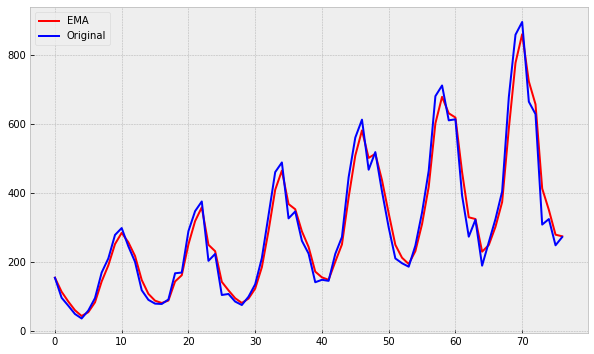

In [25]:
ser_ema = exp_moving_average(df_1['Count'], 0.7)

with plt.style.context('bmh'):
    plt.figure(figsize=(10,6))
    plt.plot(ser_ema, color='red', label='EMA')
    plt.plot(df_1['Count'], color='blue', label='Original')
    plt.legend()

#### Функция для предсказания с помощью EMA

In [51]:
def fun_pred_ema(series, alpha, n_pred=None):
    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n-1] + (1 - alpha) * result[n-1])
    if not n_pred:
        return pd.Series(result)
    
    predictions = [alpha * series[len(series) - 1] + (1 - alpha) * result[-1]]

    for _ in range(n_pred):
        res = alpha * predictions[-1] + (1 - alpha) * result[-1]
        result.append(res)
        predictions.append(res)
    
    return series.append(pd.Series(predictions), ignore_index=True), pd.Series(result)

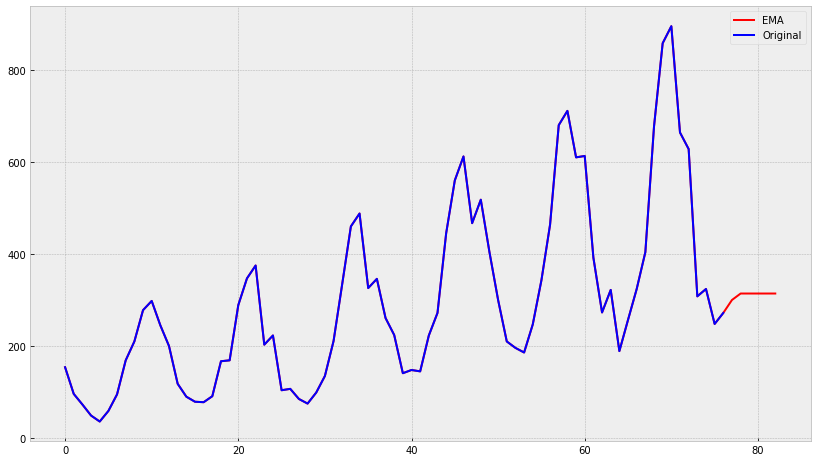

In [53]:
pred_ema, _ = fun_pred_ema(df_1['Count'], 0.5, 5)

with plt.style.context('bmh'):
    plt.figure(figsize=(14,8))
    plt.plot(pred_ema, color='red', label='EMA')
    plt.plot(df_1['Count'], color='blue', label='Original')
    plt.legend()

#### Двойное экспоненциальное сглаживание

In [61]:
def double_ema(series, alpha, beta):
    result = [series[0]]
    level = series[0]
    trend = series[1] - series[0]
    for n in range(1, len(series)):
        value = series[n]
        last_level = level
        level = alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level - last_level) + (1-beta)*trend
        result.append(level+trend)
    return pd.Series(result)

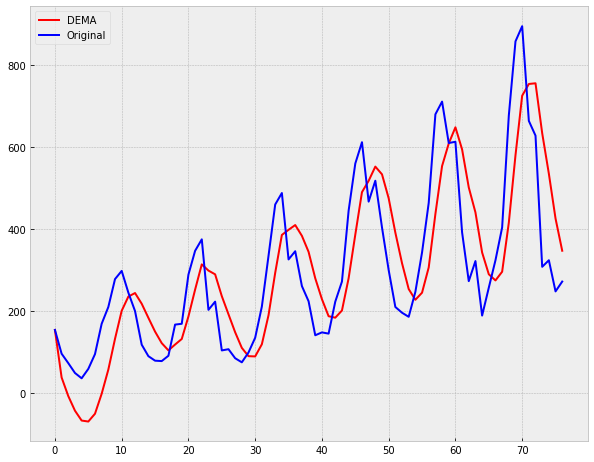

In [67]:
series_dema = double_ema(df_1['Count'], 0.3, 0.2)

with plt.style.context('bmh'):
    plt.figure(figsize=(10,8))
    plt.plot(series_dema, color='red', label='DEMA')
    plt.plot(df_1['Count'], color='blue', label='Original')
    plt.legend()

#### Предсказания по DEMA

In [68]:
def predict_dema(series, alpha, beta, n_pred):
    result = [series[0]]
    level = series[0]
    trend = series[1] - series[0]
    for n in range(1, len(series)):
        value = series[n]
        last_level = level
        level = alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level - last_level) + (1-beta)*trend
        result.append(level+trend)
        
    prediction = []
    for n in range(n_pred):
        value = result[-1]
        last_level = level
        level = alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level - last_level) + (1-beta)*trend
        result.append(level+trend)
        prediction.append(level+trend)
        
    return series.append(pd.Series(prediction), ignore_index=True), pd.Series(result)

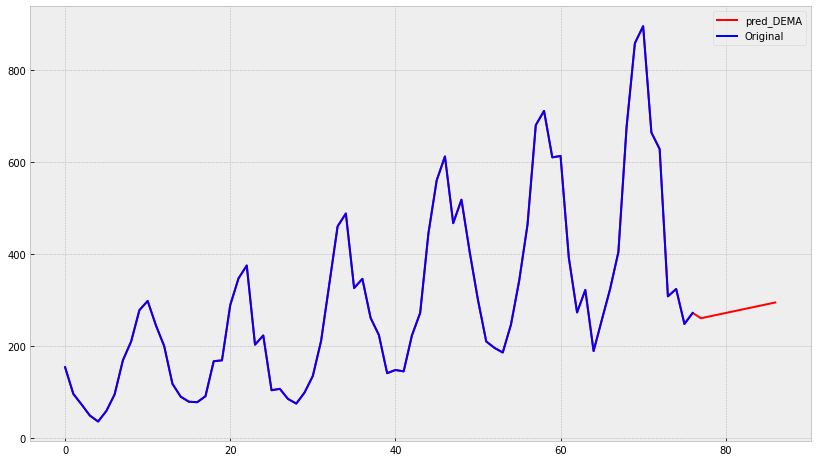

In [78]:
series_pred_dema, _ = predict_dema(df_1['Count'], 0.8, 0.8, 10)

with plt.style.context('bmh'):
    plt.figure(figsize=(14,8))
    plt.plot(series_pred_dema, color='red', label='pred_DEMA')
    plt.plot(df_1['Count'], color='blue', label='Original')
    plt.legend()

#### TEMA

In [79]:
def initial_trend(series, season_len):
    i=0
#     return sum([float(series[i + season_len] - series[i]) / season_len]) / season_len
    return sum([float(series[i + season_len] - series[i]) / season_len])

In [81]:
trend = initial_trend(df_1['Count'], 12)
trend

3.8333333333333335

In [82]:
def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

In [84]:
seasonals = initial_seasonal_components(df_1['Count'], 12)
seasonals

{0: 47.930555555555564,
 1: -65.2361111111111,
 2: -116.56944444444446,
 3: -146.73611111111111,
 4: -174.06944444444446,
 5: -154.9027777777778,
 6: -95.90277777777777,
 7: -33.06944444444444,
 8: 108.93055555555554,
 9: 236.0972222222222,
 10: 268.7638888888889,
 11: 124.7638888888889}

In [85]:
def triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0: # initial values
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

In [99]:
def plot_tema(alpha, beta, gamma, ser=df_1["Count"], n_preds=24):
    tema = triple_exponential_smoothing(ser, 12, alpha, beta, gamma, n_preds)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(ser, color='blue',label='original')
        plt.plot(tema, color='red', linewidth='4', label='TEMA')
        plt.title("alpha={}, beta={}, gamma={}".format(alpha, beta, gamma))
        plt.legend()

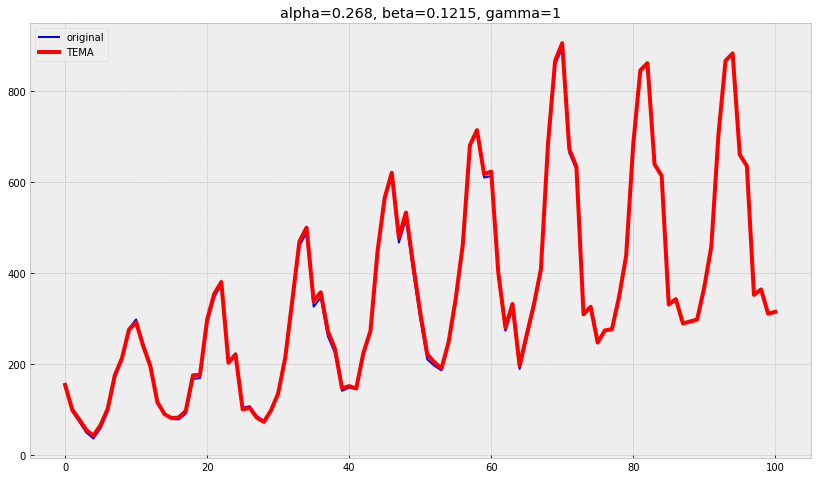

In [100]:
plot_tema(0.268, 0.1215, 1)

#### Подбор параметров

In [89]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

In [90]:
series = df_1['Count']

In [91]:
train, test, val = series[:60], series[60:70], series[70:]

In [92]:
def mse(X):
    alpha, beta, gamma = X
    result = triple_exponential_smoothing(train, 12, alpha, beta, gamma, len(test))
    predictions = result[-len(test):]
    error = mean_squared_error(predictions, test)
    return error

In [115]:
opt = minimize(mse, x0=[0.2, 0.2, 0.2], method="L-BFGS-B", bounds = ((0, 1), (0, 1), (0, 1)))
alpha_opt, beta_opt, gamma_opt = opt.x
opt

      fun: 2936.2326803800993
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.68711267e-02, -6.63021638e-02, -1.02793010e+03])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 84
      nit: 12
     njev: 21
   status: 0
  success: True
        x: array([0.26851843, 0.12150269, 1.        ])

#### Кросс-валидация

In [116]:
from sklearn.model_selection import TimeSeriesSplit

def mse_cross_val(X):
    alpha, beta, gamma = X
    split = TimeSeriesSplit(n_splits=3) 
    errors = []
    
    for train_split, test_split in split.split(train):
        train_split_ts = train.iloc[train_split]
        test_split_ts = train.iloc[test_split]
#         print(train_split_ts)
#         print(test_split_ts)
        result = triple_exponential_smoothing(train_split_ts, 12, alpha, beta, gamma, len(test_split))
        predictions = result[-len(test_split_ts):]
        error = mean_squared_error(predictions, test_split_ts)
        errors.append(error)
    print(f'{np.mean(np.array(errors))}------------')
    return np.mean(np.array(errors))

In [117]:
opt = minimize(mse_cross_val, x0=[0,0,0], method="Nelder-Mead", bounds = ((0, 1), (0, 1), (0, 1)))
# opt = minimize(mse_cross_val, x0=[0,0,0], method="L-BFGS-B", bounds = ((0, 1), (0, 1), (0, 1)))

c:\users\pklek\appdata\local\programs\python\python39\lib\site-packages\scipy\optimize\_minimize.py:535: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  warn('Method %s cannot handle constraints nor bounds.' % method,


5220.735596707828------------
5224.795015972501------------
5220.735596707828------------
5220.836391607417------------
5216.758855352828------------
5212.76773335725------------
5215.28409066546------------
5211.891356426374------------
5207.617873409563------------
5203.058577730766------------
5194.402627405216------------
5194.911517007573------------
5185.896697571373------------
5173.7602812600035------------
5168.569770605332------------
5152.000385389775------------
5152.588925975805------------
5135.220023939156------------
5129.749320084037------------
5127.992743150918------------
5163.710169646937------------
5138.634586213747------------
5236.972991291975------------
5131.091645730029------------
5136.68941976702------------
5130.237313426343------------
5133.018640818299------------
5128.600411031984------------
5133.248287986436------------
5128.280973704896------------
5127.36177941478------------
5129.092620007941------------
5126.219081064154------------
5126.39824730

In [119]:
print(opt)

 final_simplex: (array([[-7.23738887e-04,  5.49937781e+00,  1.24913473e+00],
       [-7.23731929e-04,  5.49942566e+00,  1.24914556e+00],
       [-7.23726847e-04,  5.49933577e+00,  1.24912515e+00],
       [-7.23730504e-04,  5.49929319e+00,  1.24911537e+00]]), array([2877.89589426, 2877.89589428, 2877.89589563, 2877.89589567]))
           fun: 2877.8958942575823
       message: 'Optimization terminated successfully.'
          nfev: 245
           nit: 138
        status: 0
       success: True
             x: array([-7.23738887e-04,  5.49937781e+00,  1.24913473e+00])


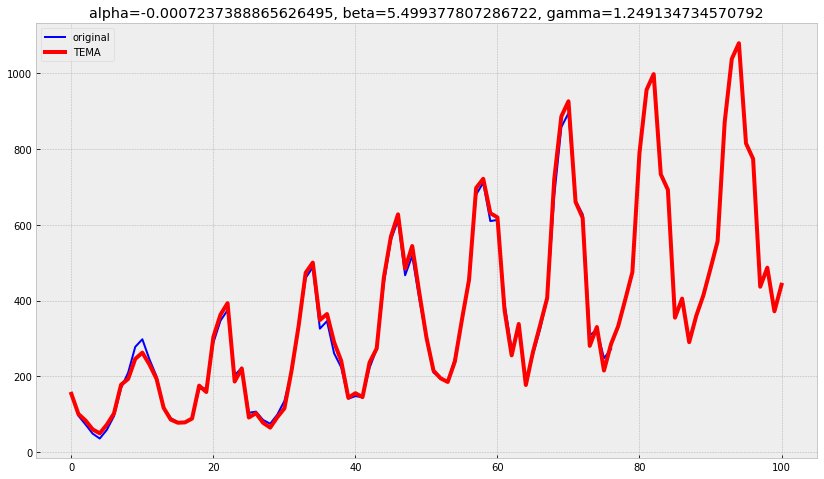

In [120]:
alpha_opt, beta_opt, gamma_opt = opt.x

plot_tema(alpha_opt, beta_opt, gamma_opt)